In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/MPI-ESM-MR/mpiesm_pr_197001-200512.nc')
 
data

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:35:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01 1980-02-01 ... 2005-12-01
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:35:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2005-09-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-06-01 1980-07-01 ... 2005-10-01
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:35:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [5]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [6]:
#data["pr"]["y"][287:337].values

In [7]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [8]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[8.71103402e-05, 7.87292811e-05, 7.69850740e-05, ...,
        7.52129417e-05, 7.03945407e-05, 6.82432874e-05],
       [7.57600719e-05, 5.83261753e-05, 5.44166905e-05, ...,
        5.43950082e-05, 5.44426912e-05, 5.91095886e-05],
       [7.41466720e-05, 5.33213206e-05, 4.40203221e-05, ...,
        4.42095552e-05, 5.00579226e-05, 5.73444559e-05],
       ...,
       [1.05750580e-04, 1.03119724e-04, 8.21250578e-05, ...,
        2.80323642e-04, 3.69038229e-04, 4.90308099e-04],
       [1.38051939e-04, 1.17543554e-04, 9.96558229e-05, ...,
        3.07466515e-04, 3.86339554e-04, 5.14076033e-04],
       [1.85288125e-04, 1.73252221e-04, 1.24946877e-04, ...,
        4.06157022e-04, 4.94219945e-04, 5.93915291e-04]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [9]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[ 7.5263334 ,  6.80220989,  6.65151039, ...,  6.49839817,
         6.08208831,  5.89622003],
       [ 6.54567021,  5.03938155,  4.70160206, ...,  4.69972871,
         4.70384852,  5.10706846],
       [ 6.40627246,  4.6069621 ,  3.80335583, ...,  3.81970557,
         4.32500452,  4.95456099],
       ...,
       [ 9.13685008,  8.90954419,  7.095605  , ..., 24.21996268,
        31.884903  , 42.36261975],
       [11.92768752, 10.15576303,  8.61026309, ..., 26.56510687,
        33.37973747, 44.41616926],
       [16.00889401, 14.96899193, 10.79541016, ..., 35.09196667,
        42.70060323, 51.31428111]])
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

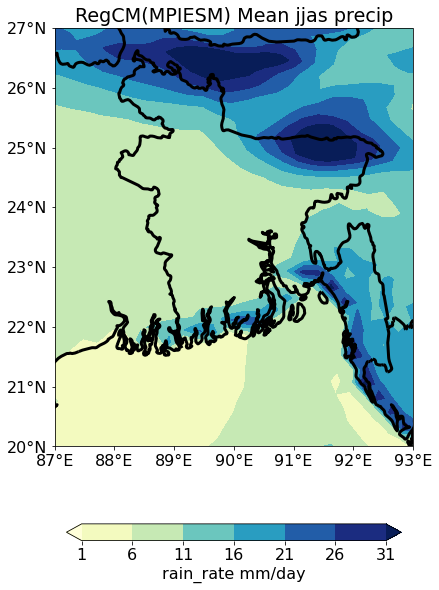

In [10]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature


plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

plt.title('RegCM(MPIESM) Mean jjas precip')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_mpiesm_jjas_mean.png")






Now I will plot the annual precipitation rate in mm/day

In [11]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[2.59601104e-04, 2.37134591e-04, 2.29580633e-04, ...,
        5.52985148e-05, 5.13305822e-05, 5.31753394e-05],
       [2.26587232e-04, 1.78351227e-04, 1.66579921e-04, ...,
        3.92699039e-05, 4.06775471e-05, 4.98275367e-05],
       [2.36121021e-04, 1.78194619e-04, 1.43157464e-04, ...,
        3.28995229e-05, 3.98426964e-05, 4.89791855e-05],
       ...,
       [1.16561663e-04, 1.19586206e-04, 1.09277535e-04, ...,
        1.18929740e-04, 1.55414920e-04, 2.03335643e-04],
       [1.58811905e-04, 1.39147960e-04, 1.29994820e-04, ...,
        1.29947264e-04, 1.62776458e-04, 2.12723869e-04],
       [2.12772531e-04, 1.97752757e-04, 1.59261865e-04, ...,
        1.68857892e-04, 2.06070574e-04, 2.45421747e-04]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

In [12]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[22.42953535, 20.48842865, 19.83576673, ...,  4.77779168,
         4.4349623 ,  4.59434933],
       [19.57713682, 15.40954602, 14.39250517, ...,  3.3929197 ,
         3.51454007,  4.30509917],
       [20.4008562 , 15.39601511, 12.36880487, ...,  2.84251878,
         3.44240897,  4.23180163],
       ...,
       [10.0709277 , 10.3322482 ,  9.44157899, ..., 10.27552953,
        13.42784911, 17.56819957],
       [13.72134858, 12.02238374, 11.23155244, ..., 11.22744363,
        14.06388595, 18.37934232],
       [18.38354669, 17.08583822, 13.7602251 , ..., 14.58932189,
        17.80449757, 21.2044389 ]])
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

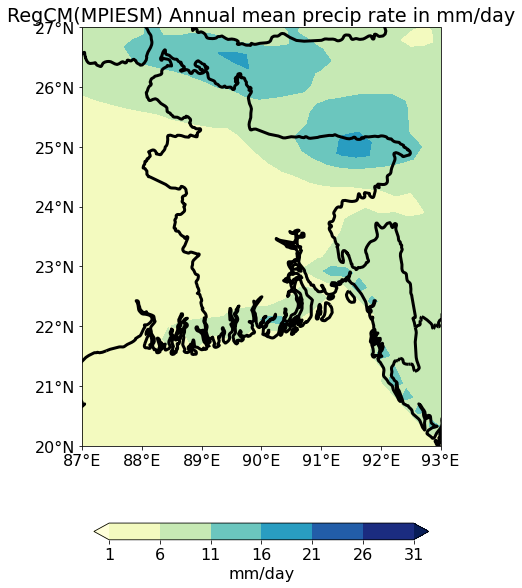

In [14]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

#plt.title('RegCM(MPIESM) Annual mean precip rate in mm/day',fontweight='bold', fontsize=15)


plt.title('RegCM(MPIESM) Annual mean precip rate in mm/day')

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_mpiesm_annual_mean.png")



